### Step 1: Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Step 2: Data Preprocessing

In [5]:
# Load data
train_df = pd.read_csv("train.csv")
X = train_df.drop("label", axis=1).values / 255.0  # Normalize pixel values
y = train_df["label"].values

In [6]:
# Split train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [13]:
# Initialization
classes = np.unique(y_train)
clf = SGDClassifier(
    loss='hinge',          # SVM loss
    max_iter=1,            # 1 epoch per partial_fit
    learning_rate='optimal',
    tol=None,
    warm_start=True,
    random_state=42
)

### Step 3: Model Training

Epoch 1/20: Val Accuracy = 0.3379, Loss = 2907.9957
Epoch 2/20: Val Accuracy = 0.3514, Loss = 2590.3197
Epoch 3/20: Val Accuracy = 0.3608, Loss = 2404.0386
Epoch 4/20: Val Accuracy = 0.3672, Loss = 2269.3730
Epoch 5/20: Val Accuracy = 0.3706, Loss = 2163.2324
Epoch 6/20: Val Accuracy = 0.3747, Loss = 2077.6318
Epoch 7/20: Val Accuracy = 0.3751, Loss = 2005.0304
Epoch 8/20: Val Accuracy = 0.3769, Loss = 1943.8770
Epoch 9/20: Val Accuracy = 0.3781, Loss = 1886.7965
Epoch 10/20: Val Accuracy = 0.3807, Loss = 1835.6954
Epoch 11/20: Val Accuracy = 0.3793, Loss = 1791.4464
Epoch 12/20: Val Accuracy = 0.3787, Loss = 1749.8004
Epoch 13/20: Val Accuracy = 0.3793, Loss = 1711.2120
Epoch 14/20: Val Accuracy = 0.3806, Loss = 1675.3782
Epoch 15/20: Val Accuracy = 0.3829, Loss = 1642.8246
Epoch 16/20: Val Accuracy = 0.3806, Loss = 1613.0883
Epoch 17/20: Val Accuracy = 0.3810, Loss = 1584.0493
Epoch 18/20: Val Accuracy = 0.3782, Loss = 1556.9745
Epoch 19/20: Val Accuracy = 0.3806, Loss = 1531.1072
Ep

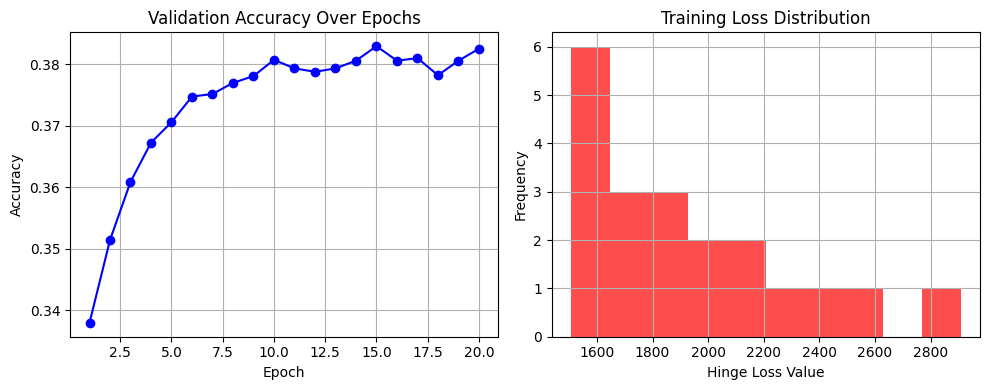

In [10]:
# Training
n_epochs = 20
val_accuracies = []
train_losses = []  # New: Store loss values per epoch

for epoch in range(n_epochs):
    clf.partial_fit(X_train, y_train, classes=classes)

    # New: Calculate hinge loss for training data
    decision_func = clf.decision_function(X_train)
    # Convert y_train to -1/1 for hinge loss calculation
    y_true = np.array([-1 if y == 0 else 1 for y in y_train])  # Simplified binary conversion
    hinge_loss = np.mean(np.maximum(0, 1 - y_true[:, np.newaxis] * decision_func))
    train_losses.append(hinge_loss)

    y_val_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)
    print(f"Epoch {epoch+1}/{n_epochs}: Val Accuracy = {acc:.4f}, Loss = {hinge_loss:.4f}")

# Create figure with two subplots
plt.figure(figsize=(10, 4))

# Plot 1: Validation Accuracy (existing)
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs + 1), val_accuracies, marker='o', color='blue')
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot 2: Training Loss Histogram (new)
plt.subplot(1, 2, 2)
plt.hist(train_losses, bins=10, color='red', alpha=0.7)
plt.title("Training Loss Distribution")
plt.xlabel("Hinge Loss Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

### Step 4: Preprocessing Test Data

In [11]:
# Load and preprocess test data
test_df = pd.read_csv("test.csv")
test_ids = test_df["id"]
X_test = test_df.drop("id", axis=1).values / 255.0  # Normalize
X_test = scaler.transform(X_test)  # Apply same scaler used on training data

# Predict using trained model
y_test_pred = clf.predict(X_test)

### Step 5 Submission File

In [12]:
# Create submission file
submission = pd.DataFrame({
    "id": test_ids,
    "label": y_test_pred
})

submission.to_csv("AROOJ-198.csv", index=False)
print("Submission.csv file saved successfully.")

Submission.csv file saved successfully.
